# Subset CMIP6 Datasets with xarray

xarray: http://xarray.pydata.org/en/stable/index.html

## Search CMIP6 Dataset with ESGF pyclient

using: https://esgf-pyclient.readthedocs.io/en/latest/index.html

In [1]:
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

In [3]:
ctx = conn.new_context(
    project='CMIP6', 
    source_id='UKESM1-0-LL', 
    experiment_id='historical', 
    variable='tas', 
    frequency='mon', 
    variant_label='r1i1p1f2')
    #data_node='esgf-data3.ceda.ac.uk')
ctx.hit_count


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


1

In [4]:
result = ctx.search()[0]
result.dataset_id

'CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Amon.tas.gn.v20190406|esgf3.dkrz.de'

In [5]:
files = result.file_context().search()
for file in files:
    print(file.opendap_url)


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc
http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc


## Subset single dataset with xarray

Using OpenDAP: http://xarray.pydata.org/en/stable/io.html?highlight=opendap#opendap

In [6]:
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
print(ds)

<xarray.Dataset>
Dimensions:    (time: 1200, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           144000.0
    creation_

In [7]:
da = ds['tas']
da = da.isel(time=slice(0, 1))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))


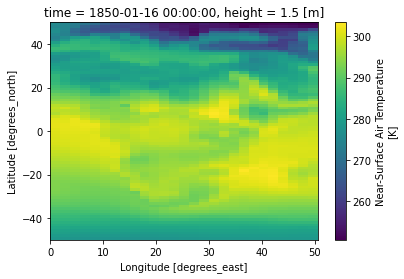

In [8]:
%matplotlib inline
da.plot()

## Subset over multiple datasets


In [9]:
ds_agg = xr.open_mfdataset([files[0].opendap_url, files[1].opendap_url], chunks={'time': 120}, combine='nested', concat_dim='time')
print(ds_agg)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:         

In [10]:
da = ds_agg['tas']
da = da.isel(time=slice(1200, 1201))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

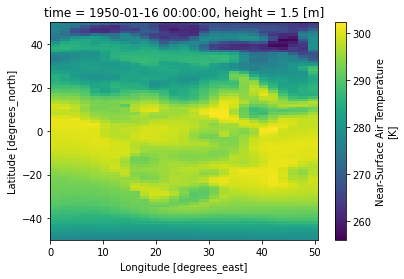

In [11]:
da.plot()

## Download dataset

In [12]:
da.to_netcdf('tas_africa_19500116.nc')

In [13]:
da

<xarray.DataArray 'tas' (time: 1, lat: 80, lon: 27)>
dask.array<getitem, shape=(1, 80, 27), dtype=float32, chunksize=(1, 80, 27), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1950-01-16 00:00:00
  * lat      (lat) float64 -49.38 -48.12 -46.88 -45.62 ... 46.88 48.12 49.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 44.06 45.94 47.81 49.69
    height   float64 1.5
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-04-05T16:02:56Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 144 192]